In [12]:
%matplotlib inline

In [1]:

from numerapi import NumerAPI
napi = NumerAPI()

all_datasets = napi.list_datasets()
dataset_versions = list(set(d.split('/')[0] for d in all_datasets))
print("Available versions: \n", dataset_versions)

DATA_VERSION = "v5.0"

current_version_files = [f for f in all_datasets if f.startswith(DATA_VERSION)]
print("Available", DATA_VERSION, "files:\n", current_version_files)

Available versions: 
 ['v5.0']
Available v5.0 files:
 ['v5.0/features.json', 'v5.0/live.parquet', 'v5.0/live_benchmark_models.parquet', 'v5.0/live_example_preds.csv', 'v5.0/live_example_preds.parquet', 'v5.0/meta_model.parquet', 'v5.0/train.parquet', 'v5.0/train_benchmark_models.parquet', 'v5.0/validation.parquet', 'v5.0/validation_benchmark_models.parquet', 'v5.0/validation_example_preds.csv', 'v5.0/validation_example_preds.parquet']


In [2]:
import json

napi.download_dataset(f"{DATA_VERSION}/features.json")

feature_metadata = json.load(open(f"{DATA_VERSION}/features.json"))
for metadata in feature_metadata:
    print(metadata, len(feature_metadata[metadata]))

2025-05-25 01:40:42,071 INFO numerapi.utils: starting download
v5.0/features.json: 291kB [00:00, 952kB/s]                            

feature_sets 17
targets 37


In [4]:
feature_sets = feature_metadata["feature_sets"]
for feature_set in ["small", "medium", "all"]:
    print(feature_set, len(feature_sets[feature_set]))

small 42
medium 705
all 2376


In [6]:
import pandas as pd

feature_set = feature_sets['small']
napi.download_dataset(f"{DATA_VERSION}/train.parquet")
train = pd.read_parquet(
    f"{DATA_VERSION}/train.parquet",
    columns=['era', 'target'] + feature_set
)

train = train[train['era'].isin(train['era'].unique()[::4])]

2025-05-25 01:43:22,234 INFO numerapi.utils: starting download
v5.0/train.parquet: 2.37GB [04:52, 8.09MB/s]                               


In [7]:
train

,era,target,feature_antistrophic_striate_conscriptionist,feature_bicameral_showery_wallaba,feature_bridal_fingered_pensioner,feature_collectivist_flaxen_gueux,feature_concurring_fabled_adapter,feature_crosscut_whilom_ataxy,feature_departmental_inimitable_sentencer,feature_dialectal_homely_cambodia,...,feature_tridactyl_immoral_snorting,feature_trimeter_soggy_greatest,feature_unanalyzable_excusable_whirlwind,feature_unbreakable_constraining_hegelianism,feature_unformed_bent_smatch,feature_unministerial_unextenuated_teleostean,feature_unmodish_zymogenic_rousing,feature_unsystematized_subcardinal_malaysia,feature_willful_sere_chronobiology,feature_zoological_peristomial_scute
id,,,,,,,,,,,,,,,,,,,,,
n0007b5abb0c3a25,0001,0.25,2,2,2,2,2,0,1,2,...,4,1,1,3,0,2,2,3,3,2
n003bba8a98662e4,0001,0.25,2,2,2,2,2,1,4,2,...,4,2,0,0,0,2,2,4,4,2
n003bee128c2fcfc,0001,0.75,2,2,2,2,2,2,2,2,...,3,1,1,0,1,2,2,0,3,2
n0048ac83aff7194,0001,0.25,2,2,2,2,2,1,4,2,...,1,3,4,1,2,2,2,2,0,2
n0055a2401ba6480,0001,0.25,2,2,2,2,2,0,0,2,...,1,0,1,0,0,2,2,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffc2d5e4b79a7ae,0573,0.00,1,2,1,0,3,2,1,1,...,2,2,1,2,3,3,3,2,2,1
nffc9844c1c7a6a9,0573,0.25,2,1,2,1,4,2,2,4,...,4,0,0,3,1,3,3,2,3,2
nffd79773f4109bb,0573,0.50,3,4,0,3,4,1,0,1,...,3,0,0,0,1,1,4,0,1,2


<Axes: title={'center': 'Number of rows per era'}, xlabel='Era'>

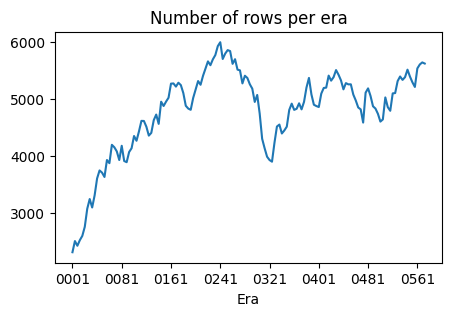

In [8]:
train.groupby("era").size().plot(
    title="Number of rows per era",
    figsize=(5, 3),
    xlabel="Era"
)

<Axes: title={'center': 'Target'}, xlabel='Value', ylabel='Frequency'>

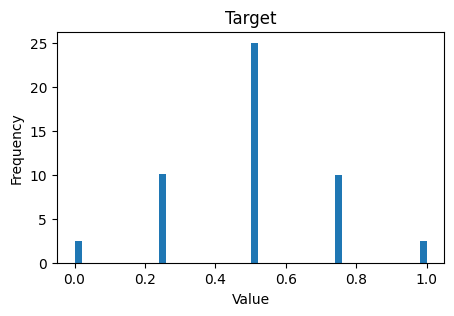

In [9]:
train['target'].plot(
    kind='hist',
    title='Target',
    figsize=(5, 3),
    xlabel='Value',
    density=True,
    bins=50
)